## **House grade prediction** 

## **problem statement:**

property buyers has different requirements so we need to determine the garde of the house cosidering different parameters.

## **Application of predicting the garde of house:**
It helps the agent in identifying the type of the house customer looking for.

While selecting the house price is the main factor,Grading differentiate the price of the house based upon grades. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
from numpy import mean
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt 
from matplotlib import pyplot
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from sklearn.model_selection import train_test_split
import seaborn as sb
import warnings
warnings.simplefilter(action='ignore')
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
df_housedata = pd.read_csv('/content/drive/MyDrive/ML/Data/DS3_C6_S2_Classification_HouseGrade_Data_Project.csv')
df_housedata.head()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,NO,0,76,2,79,6,3481,D
1,2,358,5,4,3,4,YES,71,96,3,72,4,3510,D
2,3,324,7,5,4,5,YES,101,117,5,64,3,3748,C
3,4,330,6,4,3,5,YES,101,82,2,59,2,3134,D
4,5,320,7,4,4,5,NO,0,75,3,40,1,3843,D


In [ ]:
#cheking the shape of dataframe
df_housedata.shape

(3000, 14)

In [ ]:
#checking info
df_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              3000 non-null   int64 
 1   Area(total)     3000 non-null   int64 
 2   Trooms          3000 non-null   int64 
 3   Nbedrooms       3000 non-null   int64 
 4   Nbwashrooms     3000 non-null   int64 
 5   Twashrooms      3000 non-null   int64 
 6   roof            3000 non-null   object
 7   Roof(Area)      3000 non-null   int64 
 8   Lawn(Area)      3000 non-null   int64 
 9   Nfloors         3000 non-null   int64 
 10  API             3000 non-null   int64 
 11  ANB             3000 non-null   int64 
 12  Expected price  3000 non-null   int64 
 13  Grade           3000 non-null   object
dtypes: int64(12), object(2)
memory usage: 328.2+ KB


In [ ]:
df_housedata.describe()

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000
mean,1500.500000,325.117000,7.021667,5.023000,4.513667,6.010667,48.980667,95.609333,4.013333,70.190667,3.47900,3782.938333
std,866.169729,20.507742,1.421221,1.634838,1.715263,1.786136,48.746641,14.837388,1.621532,17.563460,1.69426,567.189995
min,1.000000,290.000000,5.000000,2.000000,1.000000,2.000000,0.000000,70.000000,1.000000,40.000000,1.00000,2504.000000
25%,750.750000,308.000000,6.000000,4.000000,3.000000,5.000000,0.000000,83.000000,3.000000,55.000000,2.00000,3354.000000
50%,1500.500000,325.000000,7.000000,5.000000,4.000000,6.000000,71.000000,96.000000,4.000000,70.000000,4.00000,3771.000000
75%,2250.250000,343.000000,8.000000,6.000000,6.000000,7.000000,96.000000,109.000000,5.000000,85.000000,5.00000,4208.000000
max,3000.000000,360.000000,9.000000,8.000000,8.000000,10.000000,120.000000,120.000000,7.000000,100.000000,6.00000,5216.000000


In [ ]:
#check if any misisng values in any feature and identify those features
print(df_housedata.isnull().sum())

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64


### There are no null values present in the data 

In [ ]:
df_housedata = df_housedata.replace(to_replace = "@!#$%^&*()<>?/|}{~:?", value = np.nan)

In [ ]:
print(df_housedata.isnull().sum())

Id                0
Area(total)       0
Trooms            0
Nbedrooms         0
Nbwashrooms       0
Twashrooms        0
roof              0
Roof(Area)        0
Lawn(Area)        0
Nfloors           0
API               0
ANB               0
Expected price    0
Grade             0
dtype: int64


In [ ]:
df_housedata1 = df_housedata.copy()

In [ ]:
# creating list of object datatype columns
obj=[]
for i in df_housedata1.select_dtypes('object').columns:
  obj.append(i)

In [ ]:
for i in obj:                    #coverting it into categorical
  df_housedata1[i]=df_housedata1[i].astype('category')
df_housedata1.dtypes

Id                   int64
Area(total)          int64
Trooms               int64
Nbedrooms            int64
Nbwashrooms          int64
Twashrooms           int64
roof              category
Roof(Area)           int64
Lawn(Area)           int64
Nfloors              int64
API                  int64
ANB                  int64
Expected price       int64
Grade             category
dtype: object

In [ ]:
category=[]   #creating list of all categorical columns 
for i in df_housedata1.select_dtypes('category').columns:
  category.append(i)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
for i in category:
  df_housedata1[i] = label_encoder.fit_transform(df_housedata1[i])
df_housedata1

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,1,339,6,5,4,6,0,0,76,2,79,6,3481,3
1,2,358,5,4,3,4,1,71,96,3,72,4,3510,3
2,3,324,7,5,4,5,1,101,117,5,64,3,3748,2
3,4,330,6,4,3,5,1,101,82,2,59,2,3134,3
4,5,320,7,4,4,5,0,0,75,3,40,1,3843,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,341,9,6,5,7,1,95,115,5,90,2,4246,1
2996,2997,292,9,8,7,8,1,116,87,7,97,4,3753,0
2997,2998,328,7,4,3,5,0,0,78,5,95,6,3607,3
2998,2999,293,9,7,7,8,0,0,78,7,51,3,4198,1


In [ ]:
df_housedata.Grade.unique()

array(['D', 'C', 'B', 'A', 'E'], dtype=object)

In [ ]:
df_housedata1.Grade.unique()

array([3, 2, 1, 0, 4])

In [ ]:
df_housedata1.dtypes

Id                int64
Area(total)       int64
Trooms            int64
Nbedrooms         int64
Nbwashrooms       int64
Twashrooms        int64
roof              int64
Roof(Area)        int64
Lawn(Area)        int64
Nfloors           int64
API               int64
ANB               int64
Expected price    int64
Grade             int64
dtype: object

In [ ]:
# Defining method to perform data scaling operation based on the type of scaling
def feature_scale(scale):
  numerics = ['int64','float64']
  new_housedata_df = df_housedata1.select_dtypes(include=numerics)
  if scale == 'minmax':
    scaler = MinMaxScaler()
  else:
    scaler = StandardScaler()
  df_scaled = pd.DataFrame(scaler.fit_transform(new_housedata_df.to_numpy()),columns=new_housedata_df.columns)
  return df_scaled

In [ ]:
# scaling the data using MinMax Scaling process.It shrinks the data within the given range  0-1
scale = 'minmax'       
df_housedata1_scaled=feature_scale(scale)
df_housedata1_scaled

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
0,0.000000,0.700000,0.25,0.500000,0.428571,0.500,0.0,0.000000,0.12,0.166667,0.650000,1.0,0.360251,0.75
1,0.000333,0.971429,0.00,0.333333,0.285714,0.250,1.0,0.591667,0.52,0.333333,0.533333,0.6,0.370944,0.75
2,0.000667,0.485714,0.50,0.500000,0.428571,0.375,1.0,0.841667,0.94,0.666667,0.400000,0.4,0.458702,0.50
3,0.001000,0.571429,0.25,0.333333,0.285714,0.375,1.0,0.841667,0.24,0.166667,0.316667,0.2,0.232301,0.75
4,0.001334,0.428571,0.50,0.333333,0.428571,0.375,0.0,0.000000,0.10,0.333333,0.000000,0.0,0.493732,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0.998666,0.728571,1.00,0.666667,0.571429,0.625,1.0,0.791667,0.90,0.666667,0.833333,0.2,0.642330,0.25
2996,0.999000,0.028571,1.00,1.000000,0.857143,0.750,1.0,0.966667,0.34,1.000000,0.950000,0.6,0.460546,0.00
2997,0.999333,0.542857,0.50,0.333333,0.285714,0.375,0.0,0.000000,0.16,0.666667,0.916667,1.0,0.406711,0.75
2998,0.999667,0.042857,1.00,0.833333,0.857143,0.750,0.0,0.000000,0.16,1.000000,0.183333,0.4,0.624631,0.25


In [ ]:
corr=df_housedata1_scaled.corr()
corr.style.background_gradient(cmap='PuBuGn_r')

,Id,Area(total),Trooms,Nbedrooms,Nbwashrooms,Twashrooms,roof,Roof(Area),Lawn(Area),Nfloors,API,ANB,Expected price,Grade
Id,1.000000,0.003186,0.003165,0.004814,0.003496,0.001092,0.011059,0.013046,0.006309,-0.010939,-0.003739,-0.013219,0.009216,-0.006074
Area(total),0.003186,1.000000,0.019041,0.031328,0.031819,0.038509,0.014229,0.017029,-0.002118,0.016819,-0.000182,-0.010846,0.274507,-0.177332
Trooms,0.003165,0.019041,1.000000,0.865878,0.827072,0.794870,0.025142,0.026550,0.009557,0.862367,0.007502,0.007321,0.820170,-0.875145
Nbedrooms,0.004814,0.031328,0.865878,1.000000,0.956578,0.919158,0.023058,0.025073,0.000054,0.742132,0.002820,0.015403,0.715687,-0.865389
Nbwashrooms,0.003496,0.031819,0.827072,0.956578,1.000000,0.960007,0.028549,0.028832,0.006617,0.711936,0.011413,0.008475,0.683659,-0.847319
Twashrooms,0.001092,0.038509,0.794870,0.919158,0.960007,1.000000,0.028212,0.028763,0.008386,0.684966,0.012361,0.016492,0.654627,-0.819280
roof,0.011059,0.014229,0.025142,0.023058,0.028549,0.028212,1.000000,0.976561,-0.004640,0.014985,-0.007983,-0.020511,0.007880,-0.166635
Roof(Area),0.013046,0.017029,0.026550,0.025073,0.028832,0.028763,0.976561,1.000000,-0.006831,0.013840,-0.006331,-0.015529,0.009346,-0.170259
Lawn(Area),0.006309,-0.002118,0.009557,0.000054,0.006617,0.008386,-0.004640,-0.006831,1.000000,0.013771,0.011477,0.025751,0.011561,-0.051200
Nfloors,-0.010939,0.016819,0.862367,0.742132,0.711936,0.684966,0.014985,0.013840,0.013771,1.000000,-0.002255,0.020614,0.714598,-0.787623


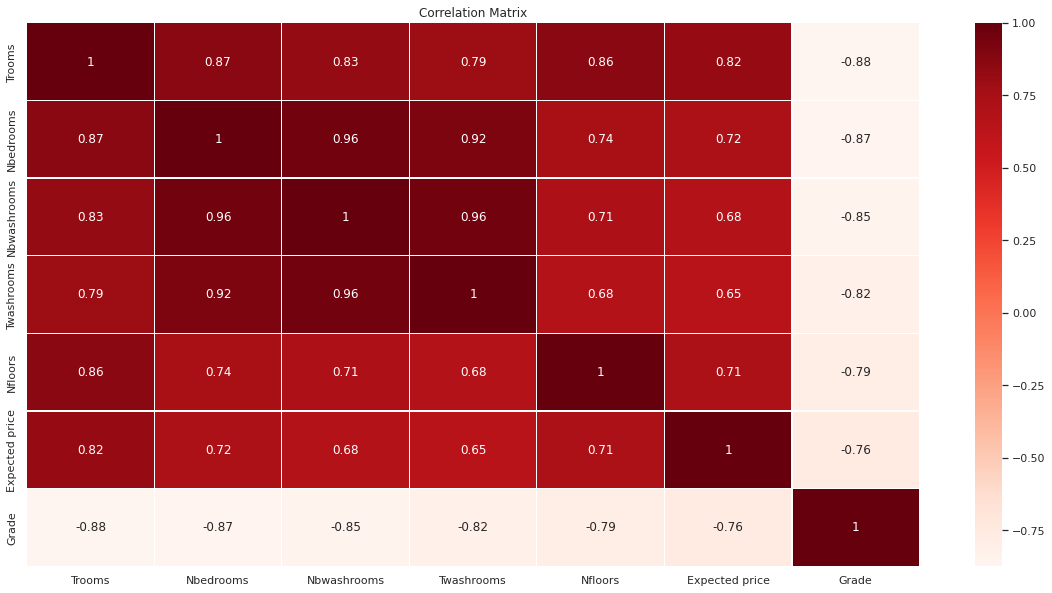

In [ ]:
#SELECTING BEST FEATURE BASED ON THERE CORRELATION VALUE GREATER THAN 0.2

sel_corr = []
for i in df_housedata1_scaled:
  if abs(df_housedata1_scaled[i].corr(df_housedata1_scaled['Grade']))>=0.7:
    sel_corr.append(i) 

#PLOTTING HEATMAP AMONG SELECTED FEATURES

fig, ax = plt.subplots(figsize = (20,10))
ax = (sns.heatmap(df_housedata1_scaled[sel_corr]
                  .corr(), annot =True, cmap ='Reds',linewidths=0.1, linecolor='white').set(title = 'Correlation Matrix'))
plt.show()


In [ ]:
corr_scaled = df_housedata1_scaled[sel_corr]

In [ ]:
corr_scaled1 = corr_scaled.copy()

In [ ]:
df_housedata1_scaled1 = df_housedata1_scaled.copy()

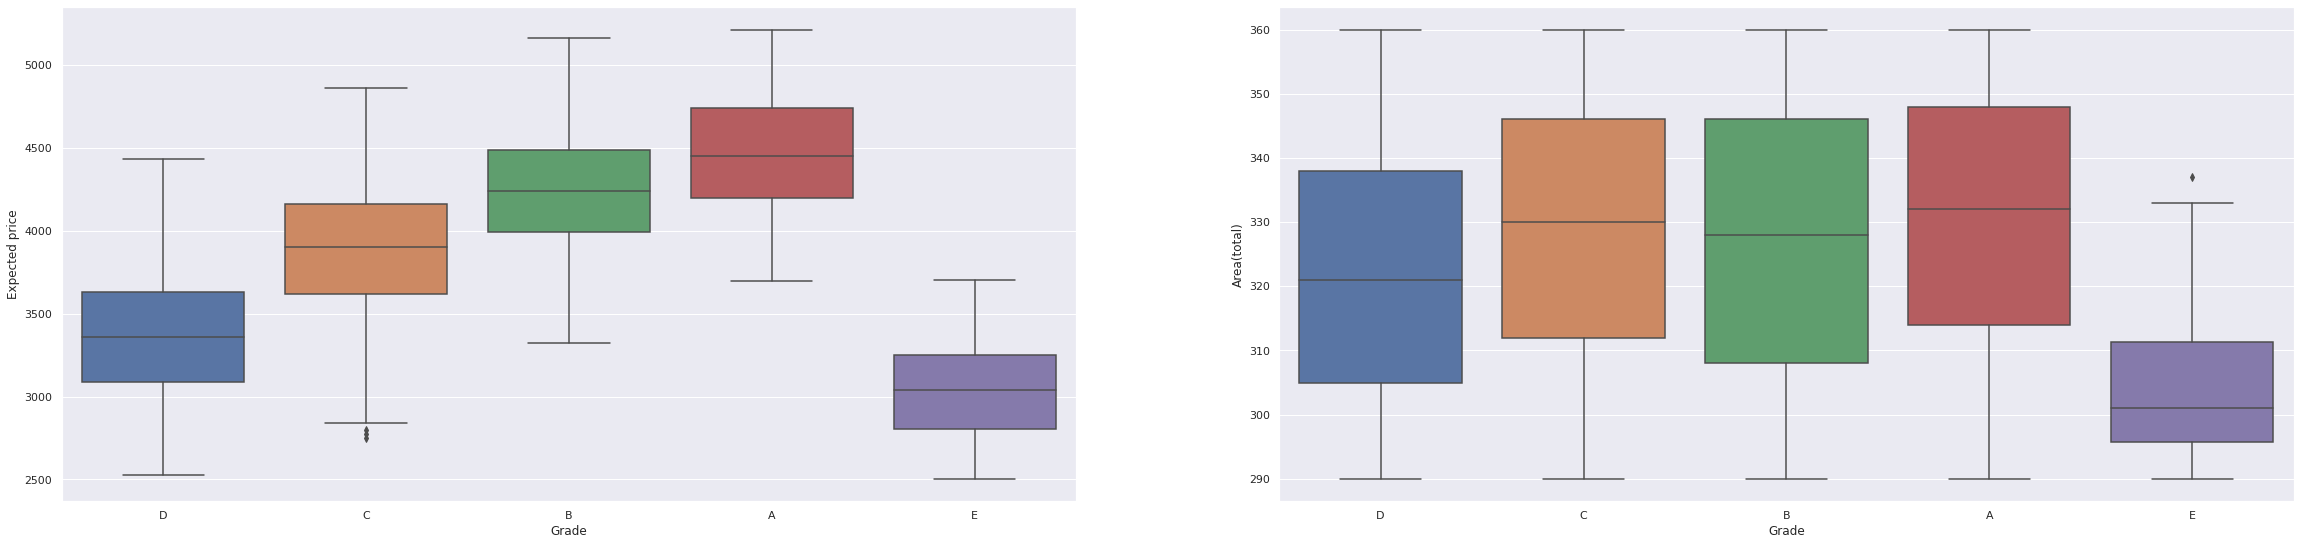

In [ ]:
sb.set_style('darkgrid')
plt.figure(figsize=(40,20))
plt.subplot(2,2,1)
sb.boxplot(x='Grade',y='Expected price',data=df_housedata)
plt.subplot(2,2,2)
sb.boxplot(x='Grade',y='Area(total)',data=df_housedata)


### 1.House category 'A' and 'B' has the highest expected price 

### 2.House category 'A','B','C' and 'D' has the area between 310-340.Less area is for the house category 'E'.

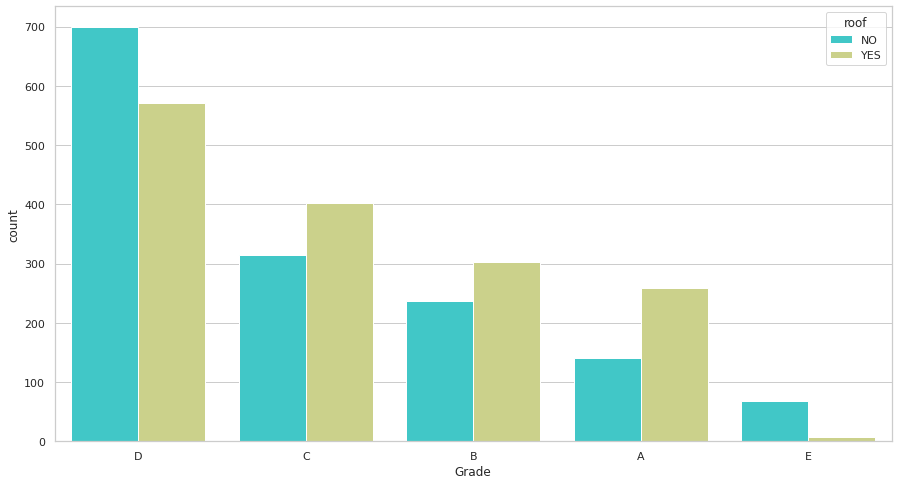

In [ ]:
sb.set_style('whitegrid')
plt.figure(figsize=(15,8))
sb.countplot(x='Grade',hue='roof',data=df_housedata,palette='rainbow')

### The highest number of the housed which are having roof are of the house category 'D' 

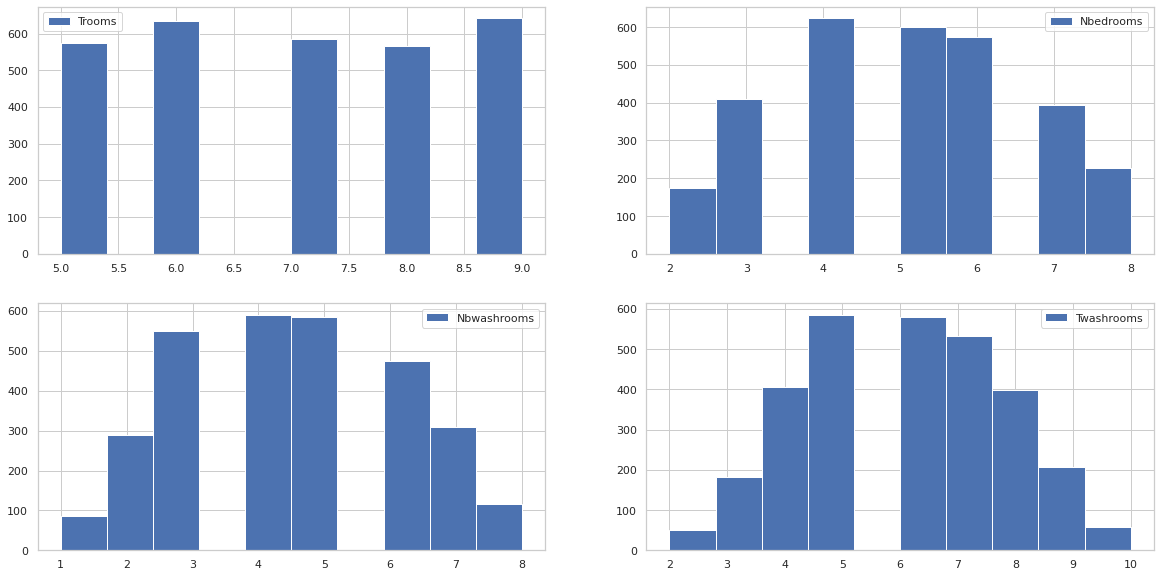

In [ ]:
cols_to_plot = ['Trooms', 'Nbedrooms','Nbwashrooms', 'Twashrooms']


fig, axs = plt.subplots(2, 2)
for n, col in enumerate(cols_to_plot):
    i, j = [int(l) for l in "{0:02b}".format(n)]
    df_housedata[col].hist(ax=axs[i][j],figsize=(20,10),legend=True)

### nbedrooms,nbwashrooms and twashrooms data is normally distributed 



In [ ]:
corr_scaled1.drop(corr_scaled1.columns[[6]], axis=1, inplace=True)
a = df_housedata1.iloc[:,[13]]
df_corr_scale = pd.concat([a, corr_scaled1], axis=1)
df_corr_scale

,Grade,Trooms,Nbedrooms,Nbwashrooms,Twashrooms,Nfloors,Expected price
0,3,0.25,0.500000,0.428571,0.500,0.166667,0.360251
1,3,0.00,0.333333,0.285714,0.250,0.333333,0.370944
2,2,0.50,0.500000,0.428571,0.375,0.666667,0.458702
3,3,0.25,0.333333,0.285714,0.375,0.166667,0.232301
4,3,0.50,0.333333,0.428571,0.375,0.333333,0.493732
...,...,...,...,...,...,...,...
2995,1,1.00,0.666667,0.571429,0.625,0.666667,0.642330
2996,0,1.00,1.000000,0.857143,0.750,1.000000,0.460546
2997,3,0.50,0.333333,0.285714,0.375,0.666667,0.406711
2998,1,1.00,0.833333,0.857143,0.750,1.000000,0.624631


In [ ]:
X = df_corr_scale.iloc[:, 1:].values 
y = df_corr_scale.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 200)
print(X_train.shape)
print(X_test.shape)

(2100, 6)
(900, 6)


In [ ]:
results_f1 = list()
results_recall = list()
results_precision = list()
results_accuracy = list()
names = list()

In [ ]:
F1_Score= list()
recall_Score= list()
precision_Score= list()
accuracy_Score= list()

## KNN Classifier

In [ ]:
from sklearn import neighbors
k=3
# learning the classifier
clf = neighbors.KNeighborsClassifier(k)
clf.fit(X_train, y_train)

# Model Properties
print(clf.classes_)
print(clf.n_neighbors)

print("The accuracy of train data set is :",clf.score(X_train, y_train))

print("The accuracy of test data set is :",clf.score(X_test, y_test))

[0 1 2 3 4]
3
The accuracy of train data set is : 0.8609523809523809
The accuracy of test data set is : 0.7788888888888889


Minimum error:- 0.20777777777777778 at K = 5


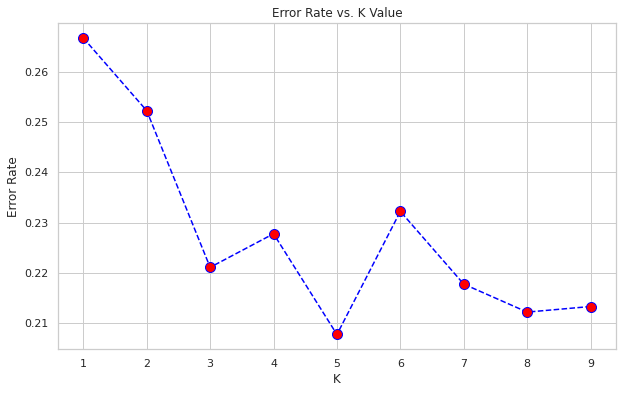

In [ ]:
error_rate = []
for i in range(1,10):
  clf_house = neighbors.KNeighborsClassifier(n_neighbors=i)
  clf_house.fit(X_train, y_train)
  pred_i = clf_house.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

## Minimum error at k=5

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

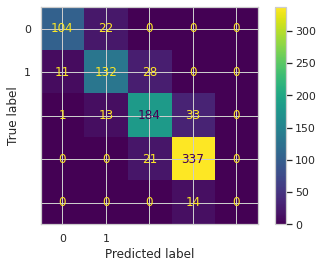

Report for KNN Classifier :
               precision    recall  f1-score   support

           A       0.87      0.83      0.85       126
           B       0.72      0.74      0.73       171
           C       0.74      0.68      0.71       231
           D       0.84      0.91      0.88       358
           E       0.17      0.07      0.10        14

    accuracy                           0.79       900
   macro avg       0.67      0.64      0.65       900
weighted avg       0.78      0.79      0.79       900

F1-Score: 0.767
recall-Score: 0.779
precision-Score: 0.763
accuracy-Score: 0.779


In [ ]:
# define the model
model_Knn = KNeighborsClassifier(5)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
n_scores1 = cross_val_score(model_Knn, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model_Knn, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model_Knn, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model_Knn, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

#confusion matrix 
rf1= model_Knn.fit(X_test, y_test)
rf1.score(X_test, y_test)
y_pred1 = rf1.predict(X_test)
cm= confusion_matrix(y_test,y_pred1)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =[0,1])
cm_display.plot()
plt.show()

#classification report 
model_Knn.fit(X_train,y_train)
y_pred_knn= model_Knn.predict(X_test)

print("Report for KNN Classifier :\n",classification_report(y_test ,y_pred_knn,target_names = ["A","B","C","D","E"]))

results_f1.append(n_scores1)
results_recall.append(n_scores2)
results_precision.append(n_scores3)
results_accuracy.append(n_scores4)
names.append('KNN Classifier')

F1_Score.append(mean(n_scores1))
recall_Score.append(mean(n_scores2))
precision_Score.append(mean(n_scores3))
accuracy_Score.append(mean(n_scores4))

# report performance
print('F1-Score: %.3f' % (mean(n_scores1)))
print('recall-Score: %.3f' % (mean(n_scores2)))
print('precision-Score: %.3f' % (mean(n_scores3)))
print('accuracy-Score: %.3f' % (mean(n_scores4)))

## Decision Tree

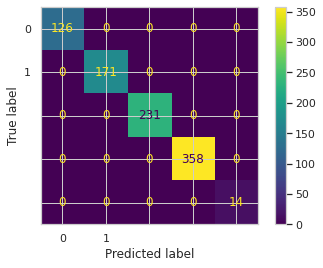

Report for DTC Classifier :
               precision    recall  f1-score   support

           A       0.82      0.79      0.81       126
           B       0.62      0.66      0.64       171
           C       0.62      0.57      0.59       231
           D       0.81      0.82      0.82       358
           E       0.09      0.14      0.11        14

    accuracy                           0.71       900
   macro avg       0.59      0.60      0.59       900
weighted avg       0.72      0.71      0.71       900

F1-Score: 0.710
recall-Score: 0.708
precision-Score: 0.717
accuracy-Score: 0.710


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define the model
model_dtree = DecisionTreeClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
n_scores1 = cross_val_score(model_dtree, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model_dtree, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model_dtree, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model_dtree, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

#confusion matrix
rf2= model_dtree.fit(X_test, y_test)
rf2.score(X_test, y_test)
y_pred2 = rf2.predict(X_test)
cm= confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =[0,1])
cm_display.plot()
plt.show()

#classification report 
model_dtree.fit(X_train,y_train)
y_pred_dt= model_dtree.predict(X_test)

print("Report for DTC Classifier :\n",classification_report(y_test ,y_pred_dt,target_names = ["A","B","C","D","E"]))

results_f1.append(n_scores1)
results_recall.append(n_scores2)
results_precision.append(n_scores3)
results_accuracy.append(n_scores4)
names.append('Decision tree')

F1_Score.append(mean(n_scores1))
recall_Score.append(mean(n_scores2))
precision_Score.append(mean(n_scores3))
accuracy_Score.append(mean(n_scores4))

# report performance
print('F1-Score: %.3f' % (mean(n_scores1)))
print('recall-Score: %.3f' % (mean(n_scores2)))
print('precision-Score: %.3f' % (mean(n_scores3)))
print('accuracy-Score: %.3f' % (mean(n_scores4)))

## Random Forest Classifier

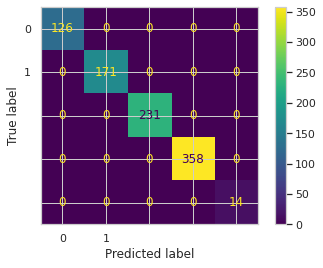

Report for RFC Classifier :
               precision    recall  f1-score   support

           A       0.81      0.84      0.82       126
           B       0.65      0.65      0.65       171
           C       0.68      0.62      0.65       231
           D       0.84      0.88      0.86       358
           E       0.23      0.21      0.22        14

    accuracy                           0.75       900
   macro avg       0.64      0.64      0.64       900
weighted avg       0.75      0.75      0.75       900

F1-Score: 0.741
recall-Score: 0.743
precision-Score: 0.740
accuracy-Score: 0.743


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# define the model
model_rf = RandomForestClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
n_scores1 = cross_val_score(model_rf, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model_rf, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model_rf, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model_rf, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

#confusion matrix
rf3= model_rf.fit(X_test, y_test)
rf3.score(X_test, y_test)
y_pred3 = rf3.predict(X_test)
cm= confusion_matrix(y_test,y_pred2)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =[0,1])
cm_display.plot()
plt.show()

#classification report 
model_rf.fit(X_train,y_train)
y_pred_rf= model_rf.predict(X_test)

print("Report for RFC Classifier :\n",classification_report(y_test ,y_pred_rf,target_names = ["A","B","C","D","E"]))

results_f1.append(n_scores1)
results_recall.append(n_scores2)
results_precision.append(n_scores3)
results_accuracy.append(n_scores4)
names.append('Random forest')

F1_Score.append(mean(n_scores1))
recall_Score.append(mean(n_scores2))
precision_Score.append(mean(n_scores3))
accuracy_Score.append(mean(n_scores4))

# report performance
print('F1-Score: %.3f' % (mean(n_scores1)))
print('recall-Score: %.3f' % (mean(n_scores2)))
print('precision-Score: %.3f' % (mean(n_scores3)))
print('accuracy-Score: %.3f' % (mean(n_scores4)))

## AdaBoost

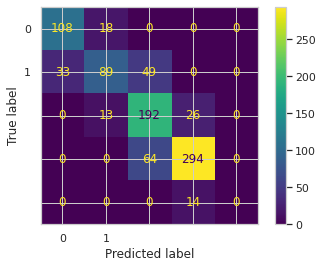

Report for ADC Classifier :
               precision    recall  f1-score   support

           A       0.00      0.00      0.00       126
           B       0.47      0.89      0.62       171
           C       0.77      0.37      0.50       231
           D       0.71      0.72      0.72       358
           E       0.11      0.86      0.20        14

    accuracy                           0.56       900
   macro avg       0.41      0.57      0.41       900
weighted avg       0.57      0.56      0.53       900

F1-Score: 0.571
recall-Score: 0.602
precision-Score: 0.604
accuracy-Score: 0.602


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
# define the model
model_ada = AdaBoostClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
n_scores1 = cross_val_score(model_ada, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model_ada, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model_ada, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model_ada, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

#confusion matrix
rf4= model_ada.fit(X_test, y_test)
rf4.score(X_test, y_test)
y_pred4 = rf4.predict(X_test)
cm= confusion_matrix(y_test,y_pred4)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =[0,1])
cm_display.plot()
plt.show()

#classification report 
model_ada.fit(X_train,y_train)
y_pred_ada= model_ada.predict(X_test)

print("Report for ADC Classifier :\n",classification_report(y_test ,y_pred_ada,target_names = ["A","B","C","D","E"]))

results_f1.append(n_scores1)
results_recall.append(n_scores2)
results_precision.append(n_scores3)
results_accuracy.append(n_scores4)
names.append('Adaboost')

F1_Score.append(mean(n_scores1))
recall_Score.append(mean(n_scores2))
precision_Score.append(mean(n_scores3))
accuracy_Score.append(mean(n_scores4))


# report performance
print('F1-Score: %.3f' % (mean(n_scores1)))
print('recall-Score: %.3f' % (mean(n_scores2)))
print('precision-Score: %.3f' % (mean(n_scores3)))
print('accuracy-Score: %.3f' % (mean(n_scores4)))

## Stacking 

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

In [ ]:
# get a stacking ensemble of models
def get_stacking():
	# define the base models
	level0 = list()
	level0.append(('knn', KNeighborsClassifier()))
	level0.append(('svm', SVC()))
	level0.append(('bayes', GaussianNB()))
	# define meta learner model
	level1 = DecisionTreeClassifier()
	# define the stacking ensemble
	model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
	return model

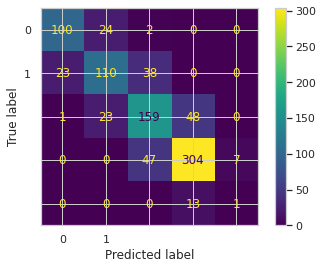

Report for STC Classifier :
               precision    recall  f1-score   support

           A       0.78      0.85      0.81       126
           B       0.66      0.59      0.63       171
           C       0.62      0.61      0.61       231
           D       0.81      0.83      0.82       358
           E       0.12      0.14      0.13        14

    accuracy                           0.72       900
   macro avg       0.60      0.60      0.60       900
weighted avg       0.72      0.72      0.72       900

F1-Score: 0.699
recall-Score: 0.695
precision-Score: 0.706
accuracy-Score: 0.699


In [ ]:
# define the model
model_sta = get_stacking()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=50)
n_scores1 = cross_val_score(model_sta, X_train, y_train, scoring='f1_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores2 = cross_val_score(model_sta, X_train, y_train, scoring='recall_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores3 = cross_val_score(model_sta, X_train, y_train, scoring='precision_weighted', cv=cv, n_jobs=-1, error_score='raise')
n_scores4 = cross_val_score(model_sta, X_train, y_train, cv=cv, n_jobs=-1, error_score='raise')

#confusion matrix
rf5= model_sta.fit(X_test, y_test)
rf5.score(X_test, y_test)
y_pred5 = rf5.predict(X_test)
cm= confusion_matrix(y_test,y_pred5)
cm_display = metrics.ConfusionMatrixDisplay(cm, display_labels =[0,1])
cm_display.plot()
plt.show()

#classification report 
model_sta.fit(X_train,y_train)
y_pred_sta= model_sta.predict(X_test)

print("Report for STC Classifier :\n",classification_report(y_test ,y_pred_sta,target_names = ["A","B","C","D","E"]))

results_f1.append(n_scores1)
results_recall.append(n_scores2)
results_precision.append(n_scores3)
results_accuracy.append(n_scores4)
names.append('stacking')

F1_Score.append(mean(n_scores1))
recall_Score.append(mean(n_scores2))
precision_Score.append(mean(n_scores3))
accuracy_Score.append(mean(n_scores4))

# report performance
print('F1-Score: %.3f' % (mean(n_scores1)))
print('recall-Score: %.3f' % (mean(n_scores2)))
print('precision-Score: %.3f' % (mean(n_scores3)))
print('accuracy-Score: %.3f' % (mean(n_scores4)))

In [ ]:
pd.DataFrame({'Model': ['KNN Classifier', 'Decision tree', 'Random forest', 'Adaboost', 'stacking'],'F1-Score':F1_Score,'recall-Score':recall_Score,'precision-Score':precision_Score,'accuracy-Score':accuracy_Score})

,Model,F1-Score,recall-Score,precision-Score,accuracy-Score
0,KNN Classifier,0.766569,0.779048,0.763034,0.779048
1,Decision tree,0.709615,0.708095,0.717229,0.709683
2,Random forest,0.741399,0.743175,0.739935,0.743333
3,Adaboost,0.571360,0.602222,0.604073,0.602222
4,stacking,0.698740,0.694921,0.705900,0.699048


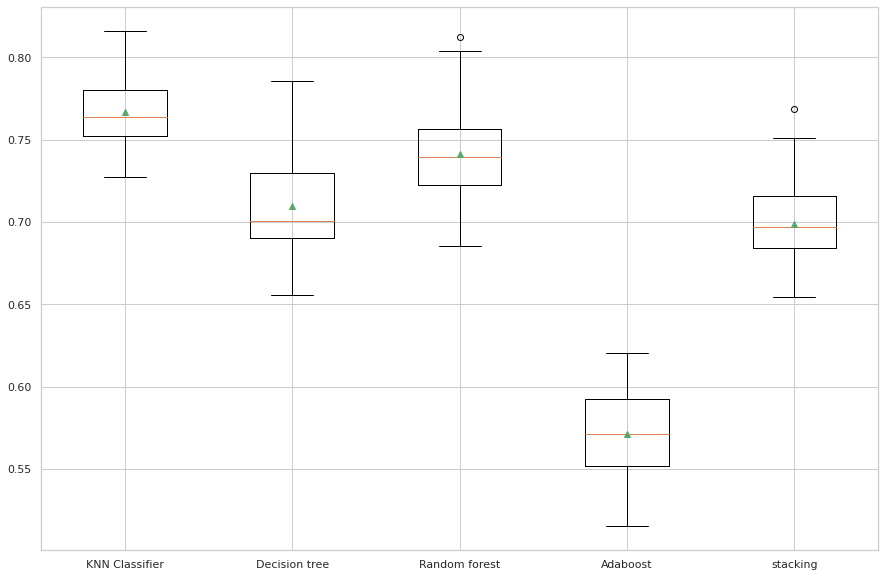

In [ ]:
from matplotlib import pyplot

# plot model performance for comparison
plt.figure(figsize=(15,10))
pyplot.boxplot(results_f1, labels=names, showmeans=True)
pyplot.show()

## **Interpretation**: KNN Classifier has the highest F1 score.It is best fitted model.

### Checking the KNN model on test dataset 

In [ ]:
classifier_knn = KNeighborsClassifier(5)
rf1= classifier_knn.fit(X_test, y_test)
rf1.score(X_test, y_test)

0.8411111111111111

In [ ]:
y_pred = rf1.predict(X_test)
y_pred

array([3, 3, 3, 1, 2, 0, 0, 3, 3, 3, 0, 3, 3, 0, 2, 1, 3, 2, 2, 3, 3, 3,
       0, 0, 3, 3, 1, 1, 3, 2, 2, 3, 3, 3, 2, 1, 2, 2, 1, 3, 3, 3, 3, 3,
       1, 0, 2, 2, 3, 2, 0, 3, 3, 1, 3, 2, 3, 3, 2, 1, 3, 2, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 3, 1, 3, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1,
       3, 2, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 3, 1, 0, 1, 3, 2,
       2, 2, 3, 3, 1, 3, 3, 2, 1, 1, 1, 2, 2, 3, 0, 1, 1, 2, 0, 3, 2, 1,
       3, 1, 0, 3, 1, 3, 1, 0, 3, 1, 3, 1, 3, 3, 3, 2, 2, 1, 1, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 1, 0, 1, 1, 2, 3, 3, 3, 1, 0, 3, 3, 3, 0, 2, 0,
       2, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 0, 3, 2, 3, 2, 1, 2, 3, 3, 2, 1,
       2, 3, 3, 1, 0, 3, 1, 3, 2, 2, 0, 0, 2, 1, 0, 3, 2, 2, 2, 3, 2, 3,
       3, 3, 1, 0, 3, 2, 3, 2, 2, 3, 0, 2, 0, 3, 2, 3, 0, 2, 1, 3, 3, 3,
       3, 2, 2, 3, 0, 3, 1, 3, 3, 3, 2, 2, 0, 3, 2, 3, 1, 1, 3, 3, 1, 0,
       2, 2, 3, 1, 1, 3, 1, 3, 0, 2, 3, 2, 3, 2, 3, 2, 3, 1, 2, 0, 1, 3,
       2, 3, 1, 1, 2, 2, 3, 2, 1, 1, 2, 2, 2, 3, 3,